In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
w_wine = pd.read_csv('datasets/winequality-white.csv', sep = ';')
r_wine = pd.read_csv('datasets/winequality-red.csv', sep = ';')

In [4]:
x = w_wine.iloc[:, 0:-1]
y = w_wine.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
y = pd.get_dummies(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=111)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [6]:
n_classes = y.shape[1]

In [22]:
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# 3. Implementação da RNA

## 3.1 Descoberta dos hyperparâmetros (Otimização Bayseana)

In [ ]:
# Import packages
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from scikeras.wrappers import KerasClassifier
from sklearn import metrics

pd.set_option("display.max_columns", None)

In [99]:
score_acc = make_scorer(accuracy_score)

In [112]:
def optmize_cnn(dropout_rate, normalization, neurons,optimizer,
                learning_rate, layers1, layers2, neurons1, neurons2, dropout):


    classificador = Sequential()

    classificador.add(Dense(units = neurons, activation='relu', input_dim = 11))
    
    if normalization > 0.5:
        classificador.add(BatchNormalization())

    for i in range(layers1):
        classificador.add(Dense(neurons1, activation='relu'))
        
    if dropout > 0.5:
        classificador.add(Dropout(dropout_rate, seed=123))

    for i in range(layers2):
        classificador.add(Dense(neurons2, activation='relu'))


    classificador.add(Dense(n_classes, activation="softmax"))

    classificador.compile(loss='categorical_crossentropy', 
                    optimizer=optimizer(learning_rate=learning_rate), metrics=['accuracy'])

    return classificador

In [113]:
def evaluate_network(dropout, normalization, learning_rate, neurons,optimizer, epochs, 
                    batch_size, layer1, layer2, neurons1, neurons2, dropout_rate):
    
    neurons = round(neurons)
    neurons1 = round(neurons1)
    neurons2 = round(neurons2)
    optimizer = round(optimizer)
    epochs = round(epochs)
    batch_size = round(batch_size)
    layer1 = round(layer1)
    layer2 = round(layer2)


    optimizer_array = [Adam, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl, SGD]
    optimizer_val = optimizer_array[optimizer]

    model = optmize_cnn(dropout_rate, normalization, neurons,optimizer_val,
                learning_rate, layer1, layer2, neurons1, neurons2, dropout)

    
    # Train on the bootstrap sample
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=50)

    nn = KerasClassifier(model=model, epochs=epochs, batch_size=batch_size, verbose=0)

    score = cross_val_score(nn, x_train, y_train, scoring=score_acc, cv=5, fit_params={'callbacks':[es]}).mean()
    
    return score

In [114]:
pbounds = {'dropout': (0.0, 0.3),
            'normalization':(0, 1),
            'learning_rate': (0.0, 0.1),
            'neurons': (4, 64),
            'optimizer': (0, 7),
            'epochs' : (50, 300),
            'batch_size': (30, 400),
            'layer1': (1,3),
            'layer2': (1,3),
            'neurons1': (4, 64),
            'neurons2': (4, 64),
            'dropout_rate': (0,0.3)
            }

optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum 
    # is observed, verbose = 0 is silent
    random_state=1
)

In [115]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

optimizer.maximize(init_points=25, n_iter=20,)

|   iter    |  target   | batch_... |  dropout  | dropou... |  epochs   |  layer1   |  layer2   | learni... |  neurons  | neurons1  | neurons2  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INFO:tensorflow:Assets written to: ram:///tmp/tmpal5cyv4p/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp52d34p13/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpjanfkc1t/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpcz902a60/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp_enz_sjk/assets
| 1         | 0.4985    | 184.3     | 0.2161    | 3.431e-05 | 125.6     | 1.294     | 1.185     | 0.01863   | 24.73     | 27.81     | 36.33     | 0.4192    | 4.797     |
INFO:tensorflow:Assets written to: ram:///tmp/tmpmvvjokd3/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp4jluaeg_/assets
INFO:tensorflow:Assets written to: 

In [120]:
params_nn_ = optimizer.max['params']
learning_rate = params_nn_['learning_rate']
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = [Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl, Adam]
params_nn_['optimizer'] = optimizerL[round(params_nn_['optimizer'])]
params_nn_['layer1'] = round(params_nn_['layer1'])
params_nn_['layer2'] = round(params_nn_['layer2'])
params_nn_['neurons1'] = round(params_nn_['neurons1'])
params_nn_['neurons2'] = round(params_nn_['neurons2'])
params_nn_

{'batch_size': 46,
 'dropout': 0.03224823873182787,
 'dropout_rate': 0.0677128015823564,
 'epochs': 228,
 'layer1': 2,
 'layer2': 1,
 'learning_rate': 0.0071974279689486775,
 'neurons': 62,
 'neurons1': 38,
 'neurons2': 16,
 'normalization': 0.2523257445703234,
 'optimizer': keras.optimizers.optimizer_v2.adamax.Adamax}

In [121]:
model = optmize_cnn(params_nn_['dropout_rate'], params_nn_['normalization'], params_nn_['neurons'],params_nn_['optimizer'],
                    params_nn_['learning_rate'], params_nn_['layer1'], params_nn_['layer2'], params_nn_['neurons1'],
                    params_nn_['neurons2'], params_nn_['dropout'])


nn = KerasClassifier(model=model, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'], verbose=0)

nn.fit(x_train, y_train, verbose=1)

Epoch 1/228
80/80 [==============================] - 1s 3ms/step - loss: 2.3429 - accuracy: 0.4048
Epoch 2/228
80/80 [==============================] - 0s 3ms/step - loss: 1.3269 - accuracy: 0.4468
Epoch 3/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2957 - accuracy: 0.4511
Epoch 4/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2883 - accuracy: 0.4506
Epoch 5/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2843 - accuracy: 0.4454
Epoch 6/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2753 - accuracy: 0.4438
Epoch 7/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2681 - accuracy: 0.4465
Epoch 8/228
80/80 [==============================] - 0s 3ms/step - loss: 1.2638 - accuracy: 0.4405
Epoch 9/228
80/80 [==============================] - 0s 3ms/step - loss: 1.2644 - accuracy: 0.4435
Epoch 10/228
80/80 [==============================] - 0s 2ms/step - loss: 1.2534 - accuracy: 0.4438
Epoch 11/

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7f2fdf2951e0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=46
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=228
	class_weight=None
)

In [122]:
nn.score(x_test, y_test)

0.5061224489795918

In [123]:
y_pred = nn.predict(x_test)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = [3,4,5,6,7,8,9]


In [124]:
y_test = y_test.idxmax(axis=1)
y_pred = y_pred.idxmax(axis=1)

In [125]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   3,   3,   1,   0,   0],
       [  0,   3,  22,  14,   1,   0,   0],
       [  4,   6, 144, 202,  15,   2,   0],
       [  1,   4,  61, 385,  84,   5,   0],
       [  0,   1,   4, 135,  84,   7,   0],
       [  0,   0,   0,  15,  14,   4,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

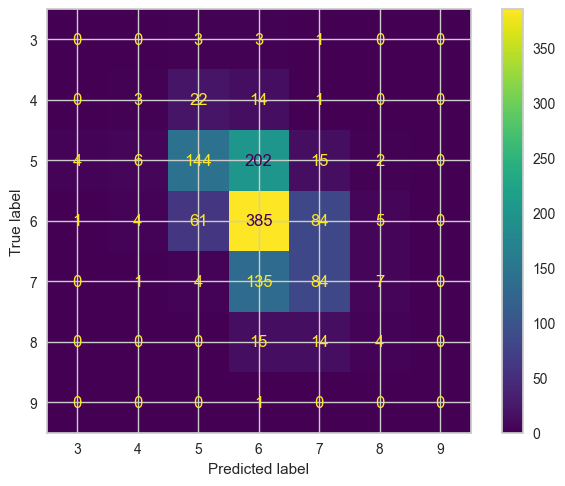

In [126]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8,9])
cm_display.plot()

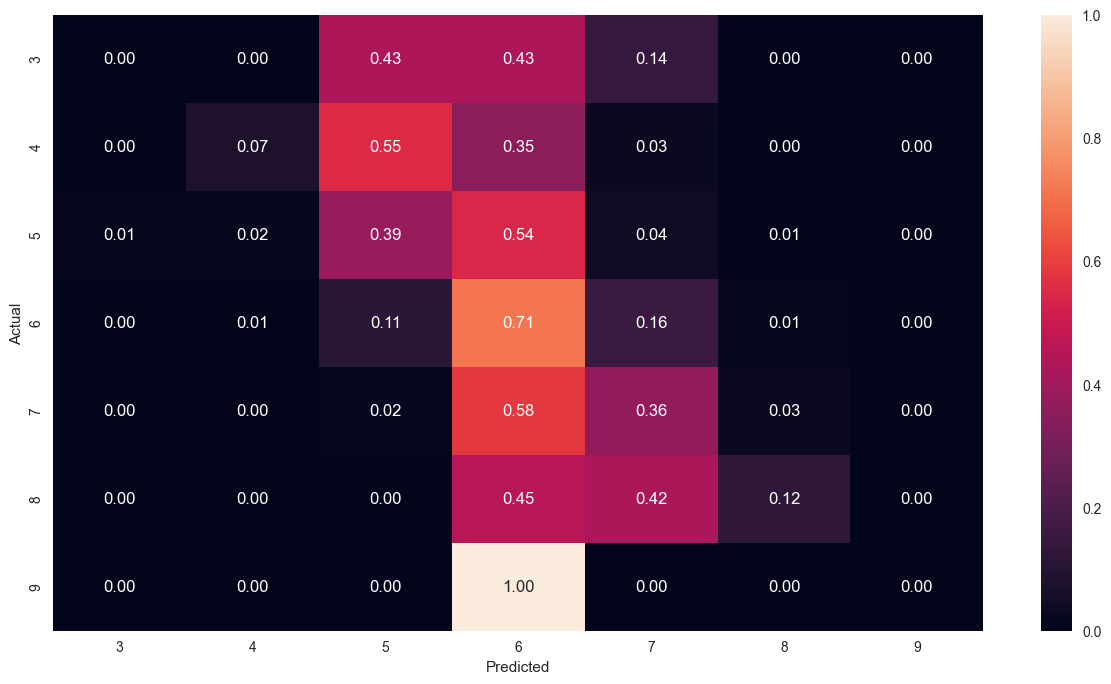

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=[3,4,5,6,7,8,9], yticklabels=[3,4,5,6,7,8,9])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)